# Beetle Classifier Robot
Welcome! You will be spending most of your time in this or a similar file while doing experiments. In this standard version, I will walk you through a common measurement run and explain what each block does. 

Have fun! 
Naor Scheinowitz, April 2022

## Importing modules and creating experiment instance
To connect to all devices, you need to create an instance of the `BCR` class. Please note that you can set `testflight=True` to test the code without any of the devices connected.

In [1]:
import BCR
import numpy as np
user = 'Naor Scheinowitz'

print('Software version: ' + str(BCR.__version__))
test = True

exp = BCR.BCR(user, testflight = test)

Software version: 0.9
00:22    Welcome to the Beetle Classifier Robot. Great to have you back!
00:22    Initializing fictional connection with ESP.
00:22    Initializing fictional connection with camera.


## ESP operation

The module `Modules.ESP` contains the classes `ESP`, `Motor` and `Polarizer`. The three of these are needed in conjunction to properly control the ESP. In short, `ESP` connects to the physical boxes, while `Motor` and `Polarizer` instances send commands to the different individual motors. Luckily, the `BCR` class takes care of most of this.

### Definitions of home positions
The home positions (0 degrees) are defined as such: 
- sample holder (`sample`): sample pointing at lamp
- camera stage (`big_arm`): 90 degrees from lamp
- linear polarizer (`lin_polarizer`): vertical
- quarter-wave plate (`quart_lambda`): horizontal

### Setting up the ESP home positions
Every time the ESP is switched on, the current positions of the axes will be defined as 0. For obvious reasons this is not very confenient. Therefore, **make sure everything is at its home positions before turning the ESP off!**

If you do manage to forget, you can redefine the home positions by moving the different stages to the required positions and then calling `Motor.define_home()`. 

**WARNING: You can define new home positions, different then the ones defined above, but then you'll need to carefully change which angles the `BCR`, `Motor`, and `Polarizer` classes send to the devices.***

### Moving the ESP
Moving a stage is done using the following command: 
```
Motor.move(degrees, mode='relative')
```
where mode can be either `relative` (default) or `absolute`.
The polarizing elements can be called directly, but you can also simply choose a fixed linear polarization using the command:
```
Polarizer.set(degrees)
```
To send an ASCII command directly to the ESP, you can use the function `ESP.send_ASCII_command(command)`. This function returns `True` if the command was sent succesfully and `False` if not. In the latter case it also prints the received error code. Please refer to the ESP documentation to find out what the error code means.

In [4]:
# Simple movement
exp.sample.move(10)
exp.big_arm.move(10)
exp.polarizer.lin_polarizer.move(10, 'absolute')
exp.polarizer.quart_lambda.move(10, 'absolute')

21:54    Moving axis 2 to position 10.0 degrees.
21:54    Moving axis 1 to position 10.0 degrees.
21:54    Moving axis 1 to position 10 degrees.
21:54    Moving axis 3 to position 10 degrees.


In [5]:
# This block moves the sample and camera using the angles defined in my thesis. 
# Basically, the angles co-rotate with the sample.
t_in = 45
t_out = 30
exp.sample.move(t_in,'absolute')
exp.big_arm.move(-90 + t_in + t_out,'absolute')

23:54    Moving axis 2 to position 45 degrees.
23:54    Moving axis 1 to position -15 degrees.


## Camera operation
The module `Modules.camera` contains the class `Cam` which can be called to connect to the *ThorLabs DCC1645C* camera. The syntax is `Cam(settings={}, testflight=False)`.

**WARNING**
After initializing the connection with e.g. `cam = Cam()`, rerunning that command will produce an error because the camera is already connected. The only way te resolve this, is to first delete your `cam` instance and recreate it. When running the file `camera.py` from the command line, this problem is resolved with `__del__` dunder that automatically closes the connection when the program terminates.

### Focusing and testing
Honestly, it is better to do any manual work with the Thorlabs software (ThorCam) instead of this script. If you already created a `Cam` instance, delete it first or the Thorlabs software won't recognize the camera as connected.

### Exposing
**Exposure must be set correctly before starting a measurement sequence!** Exposure can be set automatically using the function:
```
Cam.auto_expose(E_start=0.01, target=220, margin=20, show=True)
```
but in most cases you will have to do some manual tuning. An important thing to note is that you need to set both the frame time *and* exposure. Unfortunately, they don't nicely scale together. 

### Region of Interest
To save some space you might want to only read out a part of the sensor called the Region Of Interest (ROI). Again, 
this can be done both manually or automatically. 
```
Cam.auto_roi(mode='peak', width=50, show=True)
```
To reset the ROI, use `mode='reset'`. 

In [6]:
# Auto expose with a max pixel value target of 200
exp.cam.auto_expose(target=200, E_start=2.0)

00:04    Starting auto exposure...


In [7]:
# Set the ROI at the peak value of the sensor with a box size of 10
exp.cam.auto_roi(mode='peak', width=10, show=True)

00:04    Selecting ROI...


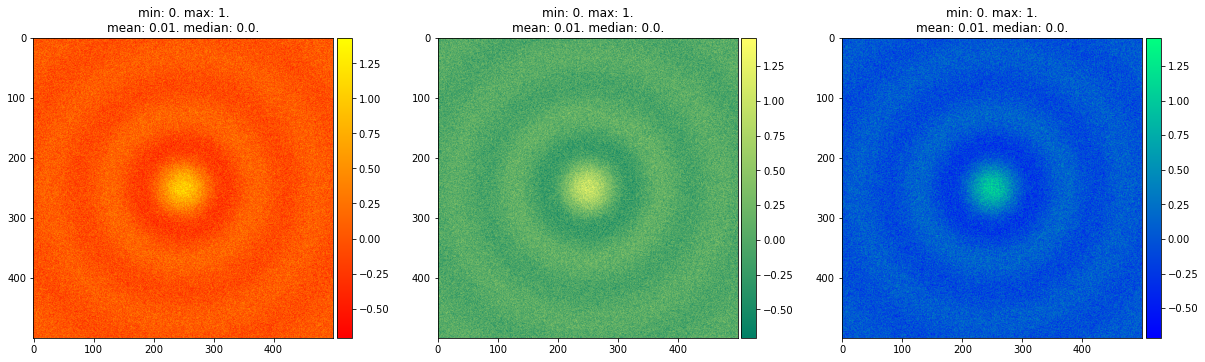

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


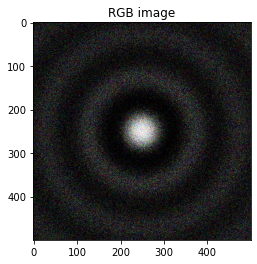

In [2]:
# Set camera settings manually. 
t = 0.6
settings = {
    'frame_period': t,
    'exposure': t,
}
exp.cam.set_settings(settings, True)
img = exp.cam.take_images(3)

## Running Experiments
The `BCR` module contains a number of measurement sequences that can be quickly called. Below is an example of a sequence where the polarizations is measured for a beetle specimen for a fixed angle of incidence and a variable amount of angles of observation. 

In [ ]:
save_path = '.'
readme = 'Test measurement'
exp.beetle_polarization(
    mode='create', 
    angle_in=45, 
    angles_out=[20,90],
    step_size=5, 
    readme=readme, 
    pol_steps=16,
    name='Test',
    path=save_path, 
    dark=True,
    median=True,
    nframes=5,
    repeats=10,
)